In [2]:
% load_ext rpy2.ipython

In [3]:
%%R
library(phyloseq)
library(ggplot2)

In [4]:
%%R
physeq = import_biom("../../SeqData/ITS.otu_table.tax.meta.biom", parseFunction = parse_taxonomy_greengenes)

In [5]:
%%R

Merge<-paste(as.character(sample_data(physeq)$Trtmt),as.character(sample_data(physeq)$Month),as.character(sample_data(physeq)$Cosm),sep="_")
sample_data(physeq)$Merge <- Merge
# Creating a new column in the phyloseq sample data called Merge,
# which contains a concatenated ID so all samples from the same mineral, month, and cosm
# will have the same ID (thus merging PCR and buffer replicates).

ps.merged = merge_samples(physeq, "Merge")
# Merging the phyloseq object by biological replicates

keep=c("Cosm","Month","Trtmt")
sd = sample_data(ps.merged)
sd = sd[,keep]
sd$Trtmt = substring(row.names(sd),1,1)
sd$Trtmt[sd$Trtmt=="B"]="Blank"
sd$Trtmt[sd$Trtmt=="F"]="Ferrihydrite"
sd$Trtmt[sd$Trtmt=="Q"]="Quartz"
sd$Trtmt[sd$Trtmt=="H"]="Heavy Fraction"
sd$Trtmt[sd$Trtmt=="S"]="Soil"
sd$Trtmt[sd$Trtmt=="K"]="Kaolinite"
sample_data(ps.merged) = sd
physeq = ps.merged

In [11]:
%%R
ps.FQS = subset_samples(physeq, (sample_data(physeq)$Trtmt=="Ferrihydrite"|sample_data(physeq)$Trtmt=="Quartz"|sample_data(physeq)$Trtmt=="Soil"))

In [6]:
%%R
physeq.noSmall<-subset_samples(physeq,sample_sums(physeq)>1500)

In [7]:
%%R
ps <- physeq.noSmall

In [8]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(ps, function(x) x / sum(x))

In [15]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.full = ordinate(ps_snorm, method = "NMDS", distance = "bray", k=3, trymax=40)
ord.full.plot = plot_ordination(ps_snorm, ord.full, axes = c(1,2), justDF = TRUE)
ord.full.plot$Samples = rownames(ord.full.plot)

Run 0 stress 0.1359395 
Run 1 stress 0.1363078 
... procrustes: rmse 0.0371042  max resid 0.1892558 
Run 2 stress 0.1401511 
Run 3 stress 0.1356021 
... New best solution
... procrustes: rmse 0.08111522  max resid 0.2151857 
Run 4 stress 0.1363014 
Run 5 stress 0.1359532 
... procrustes: rmse 0.07971171  max resid 0.2069003 
Run 6 stress 0.1374268 
Run 7 stress 0.1362564 
Run 8 stress 0.1359808 
... procrustes: rmse 0.07959663  max resid 0.2058878 
Run 9 stress 0.139439 
Run 10 stress 0.1369184 
Run 11 stress 0.1363547 
Run 12 stress 0.1361872 
Run 13 stress 0.134137 
... New best solution
... procrustes: rmse 0.02792192  max resid 0.1668893 
Run 14 stress 0.137378 
Run 15 stress 0.1354326 
Run 16 stress 0.1341407 
... procrustes: rmse 0.001133107  max resid 0.004116162 
*** Solution reached


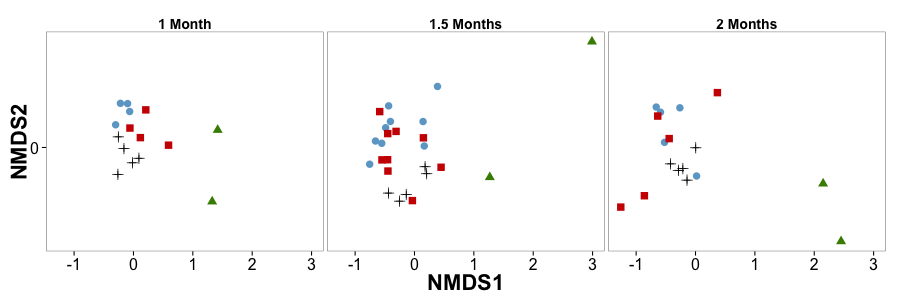

In [10]:
%%R -h 300 -w 900

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"1.5 Months","2 Months"))

p = plot_ordination(ps_snorm, ord.full, color = "Trtmt", shape = "Trtmt")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("skyblue3","chartreuse4","red3","black","gold1"))

p = p + guides(colour = guide_legend("Mineral"), shape = guide_legend("Mineral"))
# Determines the color theme of the plot overall

p = p + scale_x_continuous(breaks=c(-1,0,1,2,3))
p = p + scale_y_continuous(breaks=c(-2,0,2))

p = p + theme_bw() +
    theme(
    legend.position = "none"
    ,plot.background = element_blank()
    ,panel.grid.major = element_blank()
    ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold")
    ,axis.title = element_text(size=22, face='bold')
    ,axis.text = element_text(size=16)
    ,legend.text = element_text(size=16)
    ,legend.title = element_text(size = 22)
    ,strip.background = element_rect(colour="white", fill="white"))

p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [11]:
%%R
ggsave(filename="NMDS-ITS-3month.jpg", plot=p ,width=8.5, height=3.5)

I need to calculate similarity distances between all units and see if the values are closer for related microcosms.  
See Soil_Effect notebook. There is not a significant difference detected.

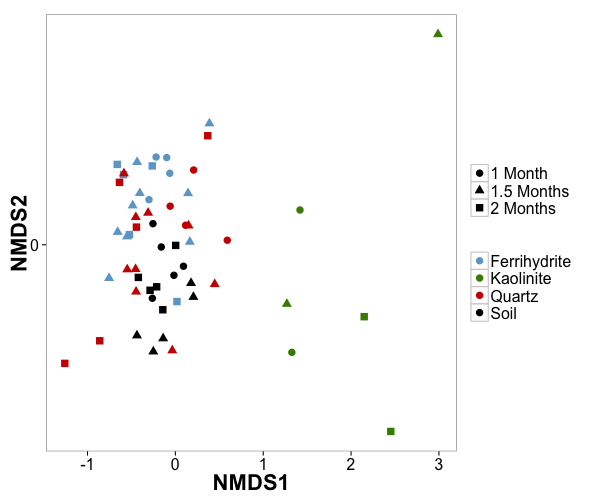

In [12]:
%%R -h 500 -w 600

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"1.5 Months","2 Months"))

p = plot_ordination(ps_snorm, ord.full, color = "Trtmt", shape = "MonthName")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("skyblue3","chartreuse4","red3","black","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
# Determines the color theme of the plot overall

p = p + scale_x_continuous(breaks=c(-1,0,1,2,3))
p = p + scale_y_continuous(breaks=c(-2,0,2))

p = p + theme_bw() +
    theme(
    legend.position = "right"
    ,plot.background = element_blank()
    ,panel.grid.major = element_blank()
    ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold")
    ,axis.title = element_text(size=22, face='bold')
    ,axis.text = element_text(size=16)
    ,legend.text = element_text(size=16)
    ,legend.title = element_text(size = 22)
    ,strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [14]:
%%R
ggsave(filename="NMDS-ITS-AllMonths.jpg", plot=p ,width=7, height=5)